# Azure Blob Storage
Azure Blob storage is unstructured, meaning that there are no restrictions on the kinds of data it can hold. 
<br>A blob can hold a document,image, JSON file. In this case we will be storing csv files.
<br>**Please note:**
<br>Blobs are usually not appropriate for structured data that needs to be queried frequently. They have higher latency than memory and local disk and don't have the indexing features that make databases efficient at running queries. However, you can use them in combination with databases to store non-queryable data.
<br><br>
The **objective** of this project is to upload and retrive sensor data in form of csv files. Then make some plots of the data once the csv files are downloaded.

### Installing Packages

We begin by installing the Azure Storage Blobs client library for Python with pip
<br> Run this command in terminal 
<br> Run it in the **Anaconda Prompt** if you are use the IPython environment

In [ ]:
pip install azure-storage-blob

**Import necesssary packages**

In [1]:
import pyodbc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import os, uuid, sys
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

### Create a storage account
You can create a new storage account using the [Azure Portal](https://docs.microsoft.com/en-us/azure/storage/common/storage-account-create?tabs=azure-portal), [Azure PowerShell](https://docs.microsoft.com/en-us/azure/storage/common/storage-account-create?tabs=azure-powershell) or [Azure CLI](https://docs.microsoft.com/en-us/azure/storage/common/storage-account-create?tabs=azure-cli)

### Create the client
A client will interact with three types of resources: the storage account itself, blob storage containers, and blobs
<br>By default, all blobs require authentication to access. However, individual containers can be configured to allow public access
<br>Use the connection string to initialize the Azure Storage client library. You can get your connection string through the [Azure Portal](https://docs.microsoft.com/en-us/azure/storage/common/storage-account-create?tabs=azure-portal), [Azure PowerShell](https://docs.microsoft.com/en-us/azure/storage/common/storage-account-create?tabs=azure-powershell) or [Azure CLI](https://docs.microsoft.com/en-us/azure/storage/common/storage-account-create?tabs=azure-cli)

In [2]:
CONN = "your_connection_string"
service = BlobServiceClient.from_connection_string(conn_str=CONN)

#### Create new Container
Every blob is stored inside a blob container.
<br>Container and blob names must conform to a set of rules, including length limitations and character restrictions. 
<br>Blob names are used to indicate meaning and structure. They can include file name extensions like .csv to indicate what kind of data they contain. 
<br>For more information on the naming rules:
- 

In [3]:
def create_container(connect_str):
    
    proceed = True
    
    while proceed:
        name = input("Enter new container name: ")
        container = ContainerClient.from_connection_string(conn_str = connect_str, container_name=name)
        container.create_container()
        print("Container {} successfuly created!".format(name))
        
        choice = input('Do you want to create another conatiner? \n1. Yes\n2. No\n')
        if choice != '1':
                print("That's it for now.")
                proceed = False
        
try:
            create_container(CONN)
                
except Exception as message:
            print("Container was not created because \n", message)
            choice = input('Try again or exit\n1. Yes\n2. No\n')
            if choice == '1':  
                create_container(connect = CONN)
            else: 
                print("You can always try again later")
                proceed = False
        

Enter new container name: metadata1
Container metadata1 successfuly created!
Do you want to create another conatiner? 
1. Yes
2. No
2
That's it for now.


### Creating Blobs
If you give your blobs hierarchical names that look like file paths, your API's listing operation can filter results to specific prefixes. This feature is referred to as virtual directories because some tools and client libraries use it to visualize and navigate Blob storage as if it was a file system.
<br><br>
**Blob Types**
<br>There are three different kinds of blobs you can store data in:
- **Block blobs** are composed of blocks of different sizes that can be uploaded independently and in parallel. 
- **Append blobs** that support only appending new data. They are great for scenarios like storing logs or writing streamed data.
- **Page blobs** are designed for scenarios that involve random-access reads and writes. 

<br>In our case Block blobs are the best choice. Their block-based structure supports very fast uploads and downloads and efficient access to individual pieces of a blob. 

In [6]:
#Creating new blob and Uploading csv file as blob

def create_blob(connect_str):
    proceed = True
    while proceed:
        container_name = input("Enter container you want to place blob in: ")
        blob_name = input("Enter new blob name: ")
        data_path = input("Enter path to file you want to upload: ")
        data_path = r'{}'.format(data_path)
        blob = BlobClient.from_connection_string(conn_str=connect_str, container_name=container_name, blob_name=blob_name)

        with open(data_path, "rb") as data:
            blob.upload_blob(data)
            print("Sucessfully uploaded")
        choice = input('Do you want to create another blob? \n1. Yes\n2. No\n')
        if choice != '1':
                print("That's it for now.")
                proceed = False
    
    
try:
            create_blob(CONN)
                
except Exception as message:
            print("Blob was not created because \n", message)
            choice = input('Try again or exit\n1. Yes\n2. No\n')
            if choice == '1':  
                create_blob(CONN)
            else: 
                print("You can always try again later.")
                proceed = False
        


Enter container you want to place blob in: laying
Enter new blob name: gyr\lay1.csv
Enter path to file you want to upload: C:\Users\Sandra\Desktop\PROJECTS\azure_blob_storage\test_data\lay-side1_MetaWear_2020-10-06T10.51.23.006_CEBAF1047CD2_Gyroscope_50.000Hz_1.5.0.csv
Sucessfully uploaded
Do you want to create another blob? 
1. Yes
2. No
2
That's it for now.


**List blobs**

In [44]:
#List the blobs in a container
def list_blob(connect_str):
    name = input("Enter container name: ")
    container = ContainerClient.from_connection_string(conn_str = connect_str, container_name = name)
    blob_list = container.list_blobs()
    
    for blob in blob_list:
        print(blob.name)
    return blob.list

list_blob(CONN)

sit_gyr
sitting


In [8]:
#Download a blob in a container

def download_blob(connect_str):
    proceed = True
    while proceed:
        container_name = input("Enter container name where the blob is stored: ")
        blob_name = input("Enter blob name: ")
        target_path = input("Enter full path to file you want to download blob to: ")
        
        blob = BlobClient.from_connection_string(conn_str=connect_str, container_name = container_name, blob_name=blob_name)
        target_path =r'{}'.format(target_path)

        with open(target_path, "wb") as my_blob:
            blob_data = blob.download_blob()
            blob_data.readinto(my_blob)
            print("Successfully downloaded")
        
        choice = input('Do you want to download another blob? \n1. Yes\n2. No\n')
        if choice != '1':
                print("That's it for now.")
                proceed = False
                
                
try:
            download_blob(CONN)
                
except Exception as message:
            print("Blob was not downloaded because \n", message)
            choice = input('Try again or exit\n1. Yes\n2. No\n')
            if choice == '1':  
                create_blob(CONN)
            else: 
                print("You can always try again later.")
                proceed = False
        
            

Enter container name where the blob is stored: laying
Enter blob name: acc\lay1.csv
Enter full path to file you want to download blob to: C:\Users\Sandra\Desktop\PROJECTS\azure_blob_storage\lay1_acc.csv
Successfully downloaded
Do you want to download another blob? 
1. Yes
2. No
1
Enter container name where the blob is stored: laying
Enter blob name: gyr\lay1.csv
Enter full path to file you want to download blob to: C:\Users\Sandra\Desktop\PROJECTS\azure_blob_storage\lay1_gyr.csv
Successfully downloaded
Do you want to download another blob? 
1. Yes
2. No
2
That's it for now.


In [4]:
# Read CSV file
#Laying down
lay_acc = pd.read_csv("lay1_acc.csv") 
lay_gyr = pd.read_csv("lay1_gyr.csv")
#Acceleromter
lay_acc_x = np.array(lay_acc['x-axis (g)'])
lay_acc_y = np.array(lay_acc['y-axis (g)'])
lay_acc_z = np.array(lay_acc['z-axis (g)'])
#Gyroscope
lay_gyr_x = np.array(lay_gyr['x-axis (deg/s)'])
lay_gyr_y = np.array(lay_gyr['y-axis (deg/s)'])
lay_gyr_z = np.array(lay_gyr['z-axis (deg/s)'])

### Let's Visualize the data

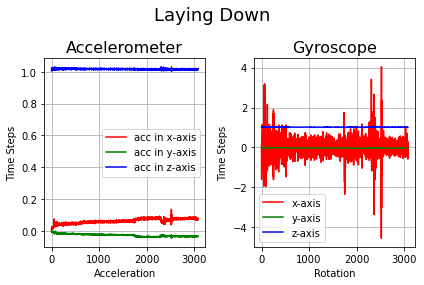

In [8]:
%matplotlib inline

#Laying
#Accelometer Data
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Laying Down', fontsize=18)

#plt.axes()
ax1.set_title('Accelerometer', fontsize=16)
ax1.plot(lay_acc_x, 'r', label='acc in x-axis')
ax1.plot(lay_acc_y, 'g', label='acc in y-axis')
ax1.plot(lay_acc_z, 'b', label='acc in z-axis')
ax1.grid(True, which='both')
ax1.set(xlabel = 'Acceleration', ylabel= 'Time Steps')
ax1.legend()

#Gyroscope Data
ax2.plot(lay_gyr_x, 'r', label='x-axis')
ax2.plot(lay_acc_y, 'g', label='y-axis')
ax2.plot(lay_acc_z, 'b', label='z-axis')
ax2.grid(True, which='both')
ax2.set_title('Gyroscope', fontsize=16)
ax2.set(xlabel = 'Rotation', ylabel= 'Time Steps')
ax2.legend()
fig.tight_layout()


### References
- https://docs.microsoft.com/en-us/learn/modules/store-app-data-with-azure-blob-storage/
- https://pypi.org/project/azure-storage-blob/